In [5]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Get x values of the sine wave
time = np.arange(0, 10, 0.1);

In [3]:
# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)

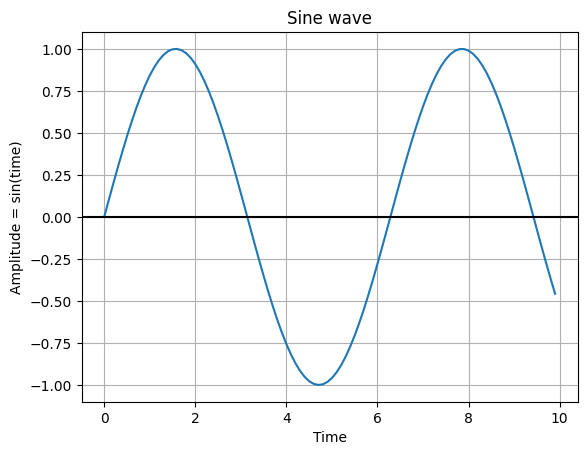

In [9]:
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

# Give a title for the sine wave plot
plt.title('Sine wave')

# Give x axis label for the sine wave plot
plt.xlabel('Time')

# Give y axis label for the sine wave plot
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

plt.show()


In [10]:
import socket
import threading, wave, pyaudio,pickle,struct

In [17]:
host_name = socket.gethostname()
host_ip = '192.168.1.102'#  socket.gethostbyname(host_name)
print(host_ip)
port = 9633


192.168.1.102


In [18]:
def audio_stream_UDP():

    BUFF_SIZE = 65536
    server_socket = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
    server_socket.setsockopt(socket.SOL_SOCKET,socket.SO_RCVBUF,BUFF_SIZE)

    server_socket.bind((host_ip, (port)))
    CHUNK = 10*1024
    wf = wave.open("10hzSineWave.wav")
    p = pyaudio.PyAudio()
    print('server listening at',(host_ip, (port)),wf.getframerate())
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    input=True,
                    frames_per_buffer=CHUNK)

    data = None
    sample_rate = wf.getframerate()
    while True:
        msg,client_addr = server_socket.recvfrom(BUFF_SIZE)
        print('GOT connection from ',client_addr,msg)
        
        while True:
            data = wf.readframes(CHUNK)
            server_socket.sendto(data,client_addr)
            time.sleep(0.8*CHUNK/sample_rate)

In [19]:
t1 = threading.Thread(target=audio_stream_UDP, args=())
t1.start()

Exception in thread Thread-8:
Traceback (most recent call last):
  File "E:\Anaconda\envs\DLGPU\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "E:\Anaconda\envs\DLGPU\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\chami\AppData\Local\Temp\ipykernel_10180\2227731837.py", line 7, in audio_stream_UDP
OSError: [WinError 10049] The requested address is not valid in its context
